In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(123)

In [2]:
df_data  = pd.read_csv('week7_lab_data.csv')
all_features = ['crim', 'zn', 'indus',  'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
X = df_data[all_features]
y = df_data["medv"] 

# Forward and Backward Stepwise Selection

In [3]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection

In [4]:
feature_cols = ['crim', 'nox', 'rm',  'dis', 'rad', 'tax', 'ptratio', 'lstat']
X = df_data[feature_cols]
y = df_data["medv"]

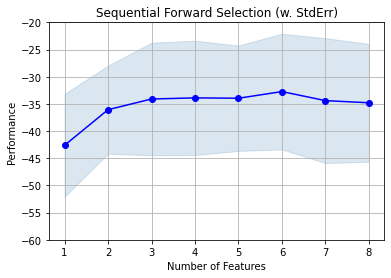

1 features:  ('lstat',)
2 features:  ('ptratio', 'lstat')
3 features:  ('rm', 'ptratio', 'lstat')
4 features:  ('crim', 'rm', 'ptratio', 'lstat')
5 features:  ('crim', 'rm', 'dis', 'ptratio', 'lstat')
6 features:  ('crim', 'nox', 'rm', 'dis', 'ptratio', 'lstat')
7 features:  ('crim', 'nox', 'rm', 'dis', 'tax', 'ptratio', 'lstat')
8 features:  ('crim', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'lstat')


In [5]:
lr = LinearRegression()

sfs_forward = SequentialFeatureSelector(lr, 
          k_features=len(feature_cols), 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs_forward = sfs_forward.fit(X, y)

fig_forward = plot_sequential_feature_selection(sfs_forward.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.ylim((-60,-20))
plt.show()

for k, items in sfs_forward.subsets_.items():
    print(f"{k} features: ", items["feature_names"])

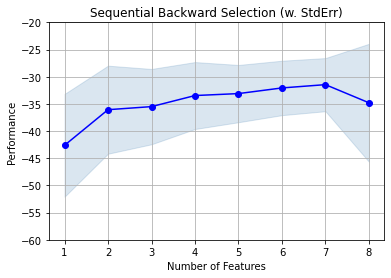

8 features:  ('crim', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'lstat')
7 features:  ('crim', 'nox', 'dis', 'rad', 'tax', 'ptratio', 'lstat')
6 features:  ('nox', 'dis', 'rad', 'tax', 'ptratio', 'lstat')
5 features:  ('nox', 'dis', 'rad', 'ptratio', 'lstat')
4 features:  ('nox', 'dis', 'ptratio', 'lstat')
3 features:  ('dis', 'ptratio', 'lstat')
2 features:  ('ptratio', 'lstat')
1 features:  ('lstat',)


In [6]:
lr = LinearRegression()

sfs_backward = SequentialFeatureSelector(lr, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs_backward = sfs_backward.fit(X, y)
fig_backward = plot_sequential_feature_selection(sfs_backward.get_metric_dict(), kind='std_err')

plt.title('Sequential Backward Selection (w. StdErr)')
plt.ylim((-60,-20))
plt.grid()
plt.show()

for k, items in sfs_backward.subsets_.items():
    print(f"{k} features: ", items["feature_names"])

## TODO 1: Try to do forward/backward stepwise selection on all 13 features. What is the "best" subset based on your own understanding? Write down the number of features and their names. Please justify your choice.

You can leverage the code above

In [7]:
# you code here
X = df_data[all_features]
y = df_data["medv"]

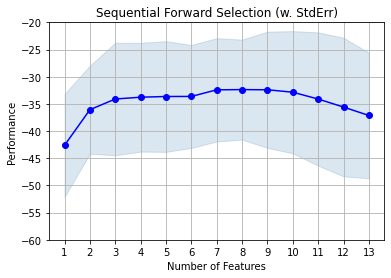

1 features (forward):  ('lstat',) avg_score -42.618472789410596
2 features (forward):  ('ptratio', 'lstat') avg_score -36.06512996421161
3 features (forward):  ('rm', 'ptratio', 'lstat') avg_score -34.100081490306884
4 features (forward):  ('chas', 'rm', 'ptratio', 'lstat') avg_score -33.76808458181476
5 features (forward):  ('crim', 'chas', 'rm', 'ptratio', 'lstat') avg_score -33.639224148324914
6 features (forward):  ('crim', 'chas', 'rm', 'dis', 'ptratio', 'lstat') avg_score -33.62764776232781
7 features (forward):  ('crim', 'indus', 'chas', 'rm', 'dis', 'ptratio', 'lstat') avg_score -32.40815780278998
8 features (forward):  ('crim', 'zn', 'indus', 'chas', 'rm', 'dis', 'ptratio', 'lstat') avg_score -32.36972002259337
9 features (forward):  ('crim', 'zn', 'indus', 'chas', 'rm', 'dis', 'ptratio', 'b', 'lstat') avg_score -32.40156468225002
10 features (forward):  ('crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'dis', 'ptratio', 'b', 'lstat') avg_score -32.850428838313135
11 features (forw

In [8]:
lr = LinearRegression()

sfs_forward = SequentialFeatureSelector(lr, 
          k_features='best',
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs_forward = sfs_forward.fit(X, y)
fig_forward = plot_sequential_feature_selection(sfs_forward.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.ylim((-60,-20))
plt.show()

for k, items in sfs_forward.subsets_.items():
    print(f"{k} features (forward): ", items["feature_names"], "avg_score", items["avg_score"])

In [9]:
print("Best subset (forward selection):", sfs_forward.k_feature_names_)

Best subset (forward selection): ('crim', 'zn', 'indus', 'chas', 'rm', 'dis', 'ptratio', 'lstat')


In the plot and the printed output, the performance seems to plateau around 8 features. It has the smallest average score with -32.37. Based on the performance metric provided (which could be an error metric like Mean Squared Error, given that lower values are better), the "best" subset of features is the one that results in the best performance (i.e., the lowest error metric). The performance might even be starting to slightly decrease after 10 features, suggesting that further addition of features might lead to overfitting or that these additional features do not contribute significantly to the model. Given these observations, I would suggest that the subset of 8 features might be the "best" choice, balancing the complexity and performance. These features are 'crim', 'zn', 'indus', 'chas', 'rm', 'dis', 'ptratio', 'lstat'.

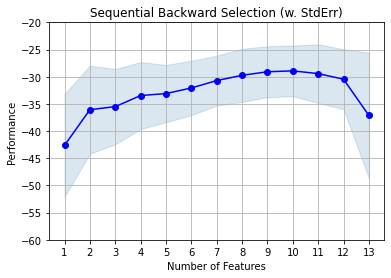

13 features:  ('crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat') avg_score -37.1318074676992
12 features:  ('crim', 'zn', 'indus', 'chas', 'nox', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat') avg_score -30.458873233689946
11 features:  ('crim', 'zn', 'chas', 'nox', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat') avg_score -29.430139419257255
10 features:  ('crim', 'zn', 'nox', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat') avg_score -28.922519544512795
9 features:  ('crim', 'zn', 'nox', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat') avg_score -29.087847587749003
8 features:  ('zn', 'nox', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat') avg_score -29.743238768854262
7 features:  ('zn', 'nox', 'dis', 'rad', 'tax', 'ptratio', 'lstat') avg_score -30.71329462403936
6 features:  ('nox', 'dis', 'rad', 'tax', 'ptratio', 'lstat') avg_score -32.06376184181258
5 features:  ('nox', 'dis', 'rad', 'ptratio', 'lstat') avg_score -33.1038129

In [10]:
lr = LinearRegression()

sfs_backward = SequentialFeatureSelector(lr, 
          k_features='best',
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs_backward = sfs_backward.fit(X, y)
fig_backward = plot_sequential_feature_selection(sfs_backward.get_metric_dict(), kind='std_err')

plt.title('Sequential Backward Selection (w. StdErr)')
plt.ylim((-60,-20))
plt.grid()
plt.show()

for k, items in sfs_backward.subsets_.items():
    print(f"{k} features: ", items["feature_names"], "avg_score", items["avg_score"])

In [11]:
print(f"Best subset (backward selection): {sfs_backward.k_feature_names_}")

Best subset (backward selection): ('crim', 'zn', 'nox', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat')


In the plot and the printed output, the performance seems to plateau around 10 features. It has the smallest average score with -28.92. Based on the performance metric provided (which could be an error metric like Mean Squared Error, given that lower values are better), the "best" subset of features is the one that results in the best performance (i.e., the lowest error metric). The performance might even be starting to slightly decrease after 10 features, suggesting that further addition of features might lead to overfitting or that these additional features do not contribute significantly to the model. Given these observations, I would suggest that the subset of 10 features might be the "best" choice, balancing the complexity and performance. These features are 'crim', 'zn', 'nox', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat'.

# Ridge regression and Lasso regression

In [12]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso

In [13]:
X = df_data[all_features]
y = df_data["medv"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
clf_lr = Pipeline([
    ('std_scaler', StandardScaler()),
    ('L_regressor',LinearRegression()),
])

In [16]:
clf_lr.fit(X_train,y_train)
y_pred_lr = clf_lr.predict(X_test)
print("------LR------")
print("LR train R2 score: %0.6f" % clf_lr.score(X_train, y_train))
print("LR test R2 score: %0.6f" % clf_lr.score(X_test, y_test))
print(clf_lr.named_steps['L_regressor'].coef_)

------LR------
LR train R2 score: 0.739234
LR test R2 score: 0.726157
[-0.98858032  0.86793276  0.40502822  0.86183791 -1.90009974  2.80813518
 -0.35866856 -3.04553498  2.03276074 -1.36400909 -2.0825356   1.04125684
 -3.92628626]


## Ridge Regression

In [17]:
clf_ridge = Pipeline([
    ('std_scaler', StandardScaler()),
    ('L_regressor', Ridge(alpha=0.1)),
]) 

clf_ridge.fit(X_train,y_train)
y_pred_ridge = clf_ridge.predict(X_test)
print("------Ridge------")
print("Ridge train R2 score: %0.6f" % clf_ridge.score(X_train, y_train))
print("Ridge test R2 score: %0.6f" % clf_ridge.score(X_test, y_test))
print(clf_ridge.named_steps['L_regressor'].coef_)

------Ridge------
Ridge train R2 score: 0.739234
Ridge test R2 score: 0.726120
[-0.98722604  0.86567745  0.40197774  0.86241287 -1.89608318  2.80888802
 -0.35892745 -3.04108762  2.02423176 -1.35675167 -2.08123083  1.04099697
 -3.92476674]


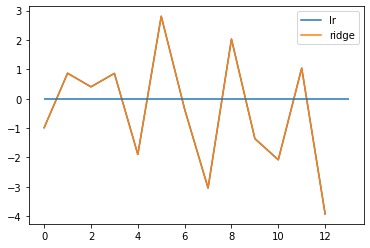

In [18]:
plt.plot(clf_lr.named_steps['L_regressor'].coef_, label = "lr")
plt.plot(clf_ridge.named_steps['L_regressor'].coef_, label = "ridge")
plt.hlines(y = 0, xmin = 0, xmax = 13)
plt.legend()
plt.show()

In [19]:
# a larger lambda will push coefficient towards zero
clf_ridge = Pipeline([
    ('std_scaler', StandardScaler()),
    ('L_regressor', Ridge(alpha=100)),
]) 

clf_ridge.fit(X_train,y_train)
y_pred_ridge = clf_ridge.predict(X_test)
print("------Ridge------")
print("Ridge train R2 score: %0.6f" % clf_ridge.score(X_train, y_train))
print("Ridge test R2 score: %0.6f" % clf_ridge.score(X_test, y_test))
print(clf_ridge.named_steps['L_regressor'].coef_)

------Ridge------
Ridge train R2 score: 0.711332
Ridge test R2 score: 0.696690
[-0.62465551  0.36705687 -0.23889316  0.94899585 -0.70011357  2.6925179
 -0.32541473 -1.31245885  0.29116678 -0.36977324 -1.54579918  0.85266916
 -2.95976482]


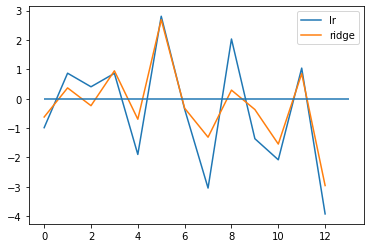

In [20]:
plt.plot(clf_lr.named_steps['L_regressor'].coef_, label = "lr")
plt.plot(clf_ridge.named_steps['L_regressor'].coef_, label = "ridge")
plt.hlines(y = 0, xmin = 0, xmax = 13)
plt.legend()
plt.show()

## Lasso Regression

In [21]:
clf_lasso = Pipeline([
    ('std_scaler', StandardScaler()),
    ('L_regressor',Lasso(alpha=0.1)),
]) 

clf_lasso.fit(X_train,y_train)
y_pred_lasso = clf_lasso.predict(X_test)
print("------Lasso------")
print("Lasso train R2 score: %0.6f" % clf_lasso.score(X_train, y_train))
print("Lasso test R2 score: %0.6f" % clf_lasso.score(X_test, y_test))
print(clf_lasso.named_steps['L_regressor'].coef_)

------Lasso------
Lasso train R2 score: 0.733414
Lasso test R2 score: 0.711239
[-0.66991383  0.43061628 -0.          0.87630476 -1.36149475  2.89584589
 -0.18487001 -2.25812838  0.46253968 -0.         -1.90039821  0.9373862
 -3.95913625]


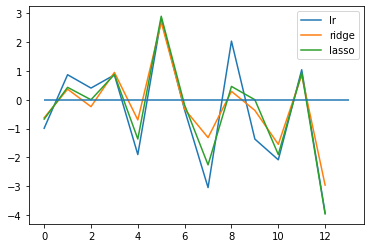

In [22]:
plt.plot(clf_lr.named_steps['L_regressor'].coef_, label = "lr")
plt.plot(clf_ridge.named_steps['L_regressor'].coef_, label = "ridge")
plt.plot(clf_lasso.named_steps['L_regressor'].coef_, label = "lasso")
plt.hlines(y = 0, xmin = 0, xmax = 13)
plt.legend()
plt.show()

In [23]:
# Select features with larger lambda (named alpha in sklearn library)
clf_lasso = Pipeline([
    ('std_scaler', StandardScaler()),
    ('L_regressor',Lasso(alpha=1)),
]) 

clf_lasso.fit(X_train,y_train)
y_pred_lasso = clf_lasso.predict(X_test)
print("------Lasso------")
print("Lasso train R2 score: %0.6f" % clf_lasso.score(X_train, y_train))
print("Lasso test R2 score: %0.6f" % clf_lasso.score(X_test, y_test))
print(clf_lasso.named_steps['L_regressor'].coef_)

------Lasso------
Lasso train R2 score: 0.672413
Lasso test R2 score: 0.654243
[-0.          0.         -0.          0.27140271 -0.          2.62932147
 -0.         -0.         -0.         -0.         -1.21106809  0.29872625
 -3.81788375]


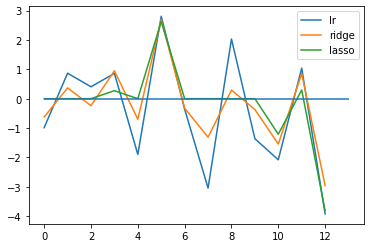

In [24]:
plt.plot(clf_lr.named_steps['L_regressor'].coef_, label = "lr")
plt.plot(clf_ridge.named_steps['L_regressor'].coef_, label = "ridge")
plt.plot(clf_lasso.named_steps['L_regressor'].coef_, label = "lasso")
plt.hlines(y = 0, xmin = 0, xmax = 13)
plt.legend()
plt.show()

## Coefficient Profiles

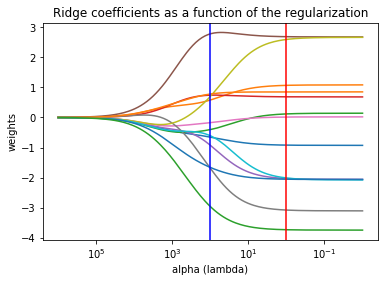

In [25]:
n_alphas = 200
alphas = np.logspace(-2, 6, n_alphas)
coefs = []
for a in alphas:
    ridge = Pipeline([
        ('std_scaler', StandardScaler()),
        ('L_regressor', Ridge(alpha=a)),
    ]) 
#     ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.named_steps['L_regressor'].coef_)

    ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha (lambda)')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.axvline(1, c='red')
plt.axvline(100, c='blue')

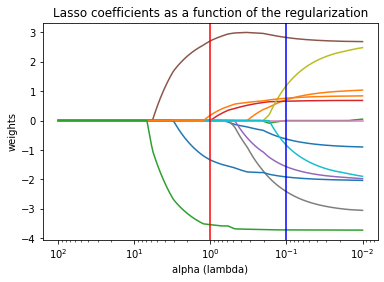

In [26]:
n_alphas = 200
alphas = np.logspace(-2, 2, n_alphas)
coefs = []
for a in alphas:
    ridge = Pipeline([
        ('std_scaler', StandardScaler()),
        ('L_regressor', Lasso(alpha=a)),
    ]) 
#     ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.named_steps['L_regressor'].coef_)

    ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha (lambda)')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.axvline(1, c='red')
plt.axvline(0.1, c='blue')

## TODO 2: Using your choice of the feature subset in TODO 1, plot out the coefficient profiles for both Ridge Regression and Lasso Regression. If you are going to decide the alpha (i.e., lambda) value for the two regression models, what values will you choose? And why?

In [27]:
# Your code here
from sklearn.linear_model import RidgeCV, LassoCV

In [28]:
forward_subset = ['crim', 'zn', 'indus', 'chas', 'rm', 'dis', 'ptratio', 'lstat'] 

In [29]:
X_subset = df_data[forward_subset]

In [30]:
scaler = StandardScaler()
X_subset_standardized = scaler.fit_transform(X_subset)

In [31]:
n_alphas = 200
alphas = np.logspace(-2, 6, n_alphas)

In [32]:
ridge_coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_subset_standardized, y)
    ridge_coefs.append(ridge.coef_)

In [33]:
# RidgeCV
ridge_alphas = np.logspace(-2, 6, n_alphas)
ridge_cv = RidgeCV(alphas=ridge_alphas, store_cv_values=True)
ridge_cv.fit(X_subset_standardized, y)
ridge_best_alpha = ridge_cv.alpha_
print(f'Optimal alpha for Ridge: {ridge_best_alpha}')

Optimal alpha for Ridge: 12.458833642950081


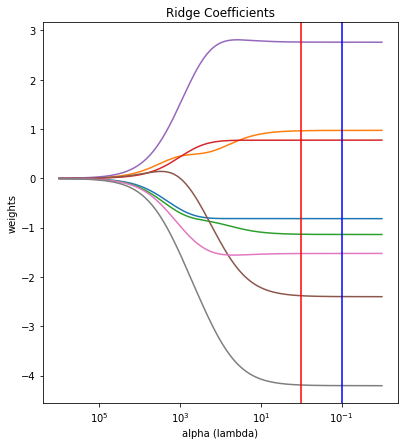

In [40]:
plt.figure(figsize=(14, 7))
plt.subplot(121)
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('alpha (lambda)')
plt.ylabel('weights')
plt.title('Ridge Coefficients')
plt.axis('tight')
plt.axvline(1, c='red')
plt.axvline(0.1, c='blue')

In [35]:
lasso_coefs = []
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_subset_standardized, y)
    lasso_coefs.append(lasso.coef_)

In [36]:
# LassoCV
lasso_cv = LassoCV(alphas=alphas, max_iter=10000, cv=5)
lasso_cv.fit(X_subset_standardized, y)
lasso_best_alpha = lasso_cv.alpha_
print(f'Optimal alpha for Lasso: {lasso_best_alpha}')

Optimal alpha for Lasso: 0.01


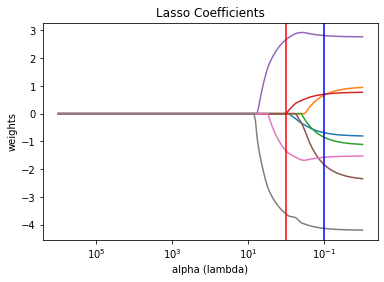

In [37]:
plt.subplot()
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('alpha (lambda)')
plt.ylabel('weights')
plt.title('Lasso Coefficients')
plt.axis('tight')
plt.axvline(1, c='red')
plt.axvline(0.1, c='blue')
plt.show()

### Explanation
Choosing an alpha where the coefficients plateau suggests that further increases in alpha will only reduce the variance without significantly reducing bias. This is often where the model is complex enough to capture the underlying patterns in the data, but simple enough to maintain its ability to generalize well to unseen data. At this point, I have a model that is neither overfitting nor underfitting. The plateau indicates that each feature's influence on the prediction has been balanced with the others, neither dominated by a few nor too spread out to be meaningless. For the Ridge regression model, I would choose an alpha where the coefficient paths start to plateau before becoming completely flat, indicating a good balance between bias and variance. Based on the Ridge CV, this might be around an alpha of 10. Based on the plot, we can choose the alpha in the interval between 10<sup>1</sup> and 10<sup>4</sup>.

An important strategy in selecting an alpha for Lasso regression is to identify the point where the coefficient paths begin to sharply drop to zero. At this point, an increase in alpha significantly reduces model complexity as it shrinks the coefficients of the least important features. If alpha is too large, the model might discard some important features, leading to underfitting. Therefore, similar to finding an alpha in Ridge regression where coefficient paths start to plateau, the optimal alpha in Lasso regression is the value just before coefficients sharply fall to zero, retaining important features while preventing overfitting. For the Lasso regression model, I would select an alpha that is just large enough to eliminate the least significant features, which occurs at the point where the coefficient paths sharply drop to zero. Again, accorading to the Lasso CV, this is approximately at an alpha of 0.01.